# 1. Load and Explore the IMDB dataset

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Load the IMDB dataset
num_words = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Print basic statistics
print(f"Number of training samples: {len(train_data)}")
print(f"Number of test samples: {len(test_data)}")
print(f"Length of first training sample: {len(train_data[0])}")
print(f"Length of second training sample: {len(train_data[1])}")

# Pad sequences so they have the same length
max_length = 250
train_data = pad_sequences(train_data, maxlen=max_length)
test_data = pad_sequences(test_data, maxlen=max_length)


17464789/17464789 [==============================] - 2s 0us/step
Number of training samples: 25000
Number of test samples: 25000
Length of first training sample: 218
Length of second training sample: 189


# 2. Recover a Review

In [4]:
def decode_review(text):
    # Get the word index from the dataset
    word_index = imdb.get_word_index()
    # Reverse the word index
    reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])
    # Decode the review
    decoded_review = ' '.join([reversed_word_index.get(i - 3, '?') for i in text])
    return decoded_review

print(decode_review(train_data[0]))

1641221/1641221 [==============================] - 0s 0us/step
? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are s

# 3. Experiment with Different Network Sizes

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

def build_model(hidden_units):
    model = Sequential()
    model.add(Embedding(input_dim=num_words, output_dim=16, input_length=max_length))
    model.add(Flatten())
    for units in hidden_units:
        model.add(Dense(units, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train a model with different hidden sizes for illustration
model_small = build_model([16])
model_medium = build_model([64, 64])
model_large = build_model([128, 128, 128])


Epoch 1/10
782/782 [==============================] - 3s 3ms/step - loss: 0.4130 - accuracy: 0.7874 - val_loss: 0.2953 - val_accuracy: 0.8744
Epoch 2/10
782/782 [==============================] - 2s 3ms/step - loss: 0.1488 - accuracy: 0.9479 - val_loss: 0.3353 - val_accuracy: 0.8657
Epoch 3/10
782/782 [==============================] - 2s 3ms/step - loss: 0.0384 - accuracy: 0.9914 - val_loss: 0.4201 - val_accuracy: 0.8581
Epoch 4/10
782/782 [==============================] - 2s 3ms/step - loss: 0.0075 - accuracy: 0.9990 - val_loss: 0.4826 - val_accuracy: 0.8612
Epoch 5/10
782/782 [==============================] - 2s 3ms/step - loss: 0.0021 - accuracy: 0.9999 - val_loss: 0.5338 - val_accuracy: 0.8615
Epoch 6/10
782/782 [==============================] - 2s 3ms/step - loss: 6.1978e-04 - accuracy: 1.0000 - val_loss: 0.5660 - val_accuracy: 0.8625
Epoch 7/10
782/782 [==============================] - 2s 3ms/step - loss: 3.2675e-04 - accuracy: 1.0000 - val_loss: 0.5971 - val_accuracy: 0.862

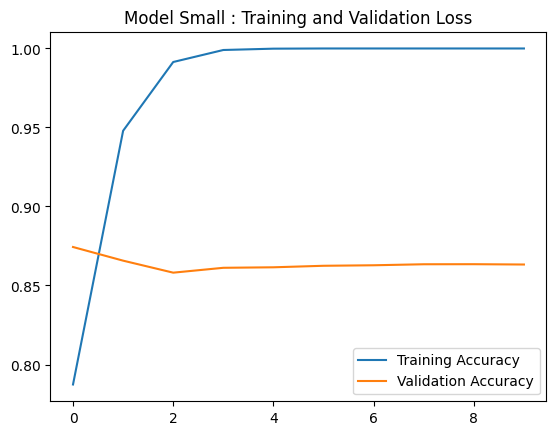

In [8]:
history = model_small.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

plt.title('Model Small : Training and Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

Epoch 1/10
782/782 [==============================] - 4s 5ms/step - loss: 0.4151 - accuracy: 0.7815 - val_loss: 0.3093 - val_accuracy: 0.8678
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 0.1371 - accuracy: 0.9506 - val_loss: 0.3791 - val_accuracy: 0.8584
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0301 - accuracy: 0.9898 - val_loss: 0.6711 - val_accuracy: 0.8437
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0247 - accuracy: 0.9915 - val_loss: 0.6382 - val_accuracy: 0.8489
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0132 - accuracy: 0.9954 - val_loss: 0.8595 - val_accuracy: 0.8450
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0123 - accuracy: 0.9961 - val_loss: 0.8592 - val_accuracy: 0.8478
Epoch 7/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0106 - accuracy: 0.9962 - val_loss: 0.8528 - val_accuracy: 0.8415
Epoch 

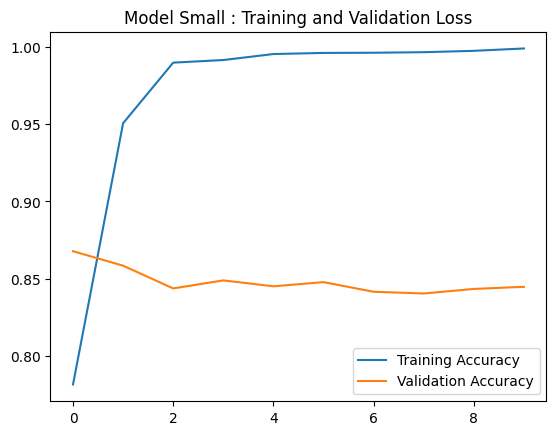

In [9]:
history = model_medium.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

plt.title('Model Small : Training and Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

Epoch 1/10
782/782 [==============================] - 7s 8ms/step - loss: 0.3990 - accuracy: 0.7984 - val_loss: 0.3078 - val_accuracy: 0.8666
Epoch 2/10
782/782 [==============================] - 7s 8ms/step - loss: 0.1354 - accuracy: 0.9505 - val_loss: 0.4169 - val_accuracy: 0.8567
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 0.0390 - accuracy: 0.9863 - val_loss: 0.5787 - val_accuracy: 0.8488
Epoch 4/10
782/782 [==============================] - 7s 8ms/step - loss: 0.0218 - accuracy: 0.9925 - val_loss: 0.7704 - val_accuracy: 0.8528
Epoch 5/10
782/782 [==============================] - 7s 8ms/step - loss: 0.0146 - accuracy: 0.9951 - val_loss: 0.8383 - val_accuracy: 0.8484
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 0.0115 - accuracy: 0.9960 - val_loss: 1.0542 - val_accuracy: 0.8453
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 0.0113 - accuracy: 0.9961 - val_loss: 0.9258 - val_accuracy: 0.8469
Epoch 

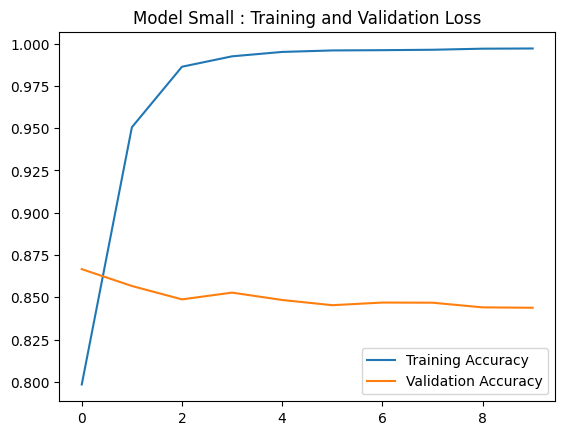

In [10]:
history = model_large.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

plt.title('Model Small : Training and Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# 4. Introduce Overfitting

Typically, a model will overfit if:

- It has too many parameters (i.e., a large model).
- It's trained for too many epochs.
- There isn't enough training data.
- 
Here's how you can train the larger model for more epochs to induce overfitting:

Epoch 1/50
782/782 [==============================] - 6s 8ms/step - loss: 0.0078 - accuracy: 0.9976 - val_loss: 1.0407 - val_accuracy: 0.8424
Epoch 2/50
782/782 [==============================] - 6s 8ms/step - loss: 0.0086 - accuracy: 0.9971 - val_loss: 1.0501 - val_accuracy: 0.8424
Epoch 3/50
782/782 [==============================] - 6s 8ms/step - loss: 0.0047 - accuracy: 0.9981 - val_loss: 1.5131 - val_accuracy: 0.8411
Epoch 4/50
782/782 [==============================] - 6s 8ms/step - loss: 0.0066 - accuracy: 0.9980 - val_loss: 1.4094 - val_accuracy: 0.8432
Epoch 5/50
782/782 [==============================] - 6s 7ms/step - loss: 0.0038 - accuracy: 0.9988 - val_loss: 1.4034 - val_accuracy: 0.8424
Epoch 6/50
782/782 [==============================] - 6s 8ms/step - loss: 0.0052 - accuracy: 0.9982 - val_loss: 1.2428 - val_accuracy: 0.8393
Epoch 7/50
782/782 [==============================] - 6s 8ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 1.9162 - val_accuracy: 0.8325
Epoch 

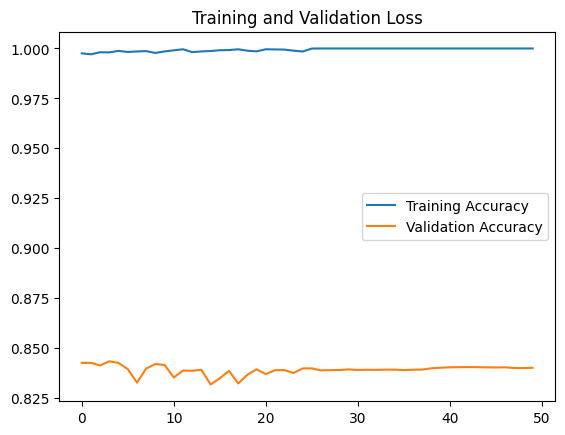

In [11]:
history_large = model_large.fit(train_data, train_labels, epochs=50, validation_data=(test_data, test_labels))

plt.title('Training and Validation Loss')
plt.plot(history_large.history['accuracy'], label='Training Accuracy')
plt.plot(history_large.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


Here we can see the effect of overfitting. The yellow show the validation accuracy and the blue shows the training accuracy. The validation accuracy decreases while the training accuracy increases. This is a clear sign of overfitting.

For preventing overfitting, there are many techniques including:

- Regularization
- Dropout
- Early stopping
- Using more training data or augmenting existing data
- Using simpler model architectures.

Remember, it's important to always validate the model on unseen data to understand how it's likely to perform in a real-world scenario.